In [57]:
from sklearn.datasets import make_circles

In [58]:
x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

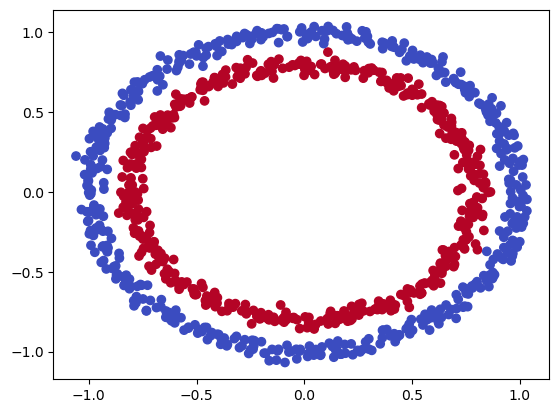

In [59]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.coolwarm);

In [60]:
type(x)

numpy.ndarray

In [61]:
import torch
from torch import nn

In [62]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [63]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
len(X_train), len(X_test)

(800, 200)

In [70]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [66]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
class circlemodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2 , out_features=10) 
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu  = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


model = circlemodel().to(device)
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [68]:
# loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [71]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs = 1000

# train , testing data's to put the device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

    model.train() # 1. step to model train

    logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(logits))

    # 2.calculate the loss
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_true=y_pred, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    # testing
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(y_logits))

        test_loss = loss_fn(test_pred, y_test)
        test_acc = accuracy_fn(y_true=y_pred, y_pred=y_pred)

    if epoch % 100 == 0:
        print(f"epoch : {epoch} | loss : {loss} |  Acc : {acc:.5f}% , test loss: {test_loss} | test acc : {test_acc: .2f}% ")





    

epoch : 0 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 100 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 200 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 300 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 400 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 500 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 600 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 700 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616877555847 | test acc :  100.00% 
epoch : 800 | loss : 0.8132616877555847 |  Acc : 100.00000% , test loss: 0.8132616